<h1>Exploratory Data Analysis</h1>

importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset



loading data


In [3]:
dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

data cleanup

In [4]:
import ast
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_type_skills']=df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

<h2>Filter for India Data Analyst roles</h2>

In [11]:
df_DA_Ind= df[(df['job_country']=='India')&(df['job_title_short']=='Data Analyst')]
df_plot= df_DA_Ind['job_location'].value_counts().head(10).to_frame()


<function matplotlib.pyplot.show(close=None, block=None)>

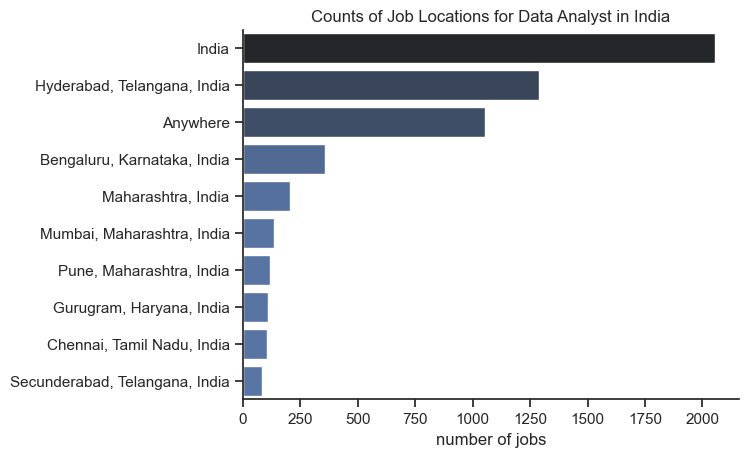

In [20]:
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Analyst in India')
plt.xlabel('number of jobs')
plt.ylabel('')
plt.show

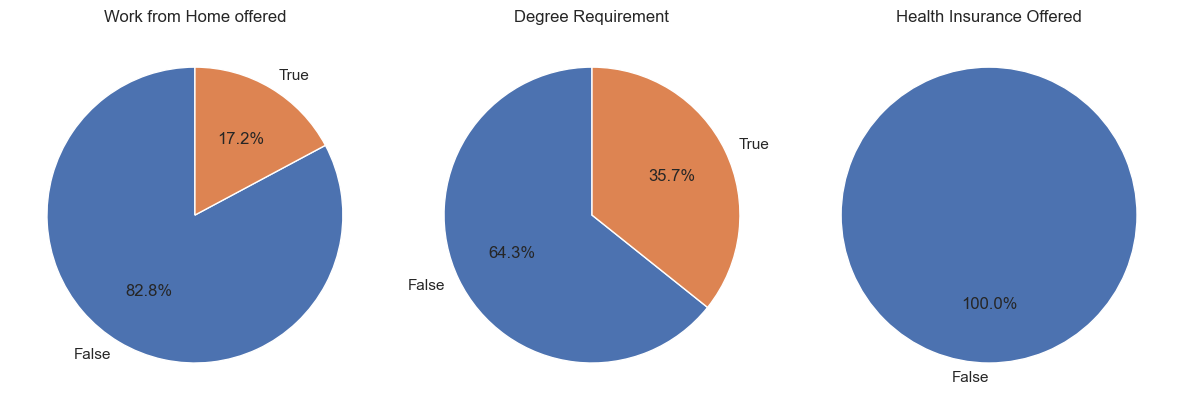

In [ ]:


dict_column = {
    'job_work_from_home': 'Work from Home offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(12, 5))  # Creating a 1-row, 3-column subplot

for i, (column, title) in enumerate(dict_column.items()):
    value_counts = df_DA_Ind[column].value_counts()  
    labels = value_counts.index.astype(str).tolist()  # Extracting unique labels dynamically
    
    ax[i].pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.tight_layout() 
plt.show()  


<function matplotlib.pyplot.show(close=None, block=None)>

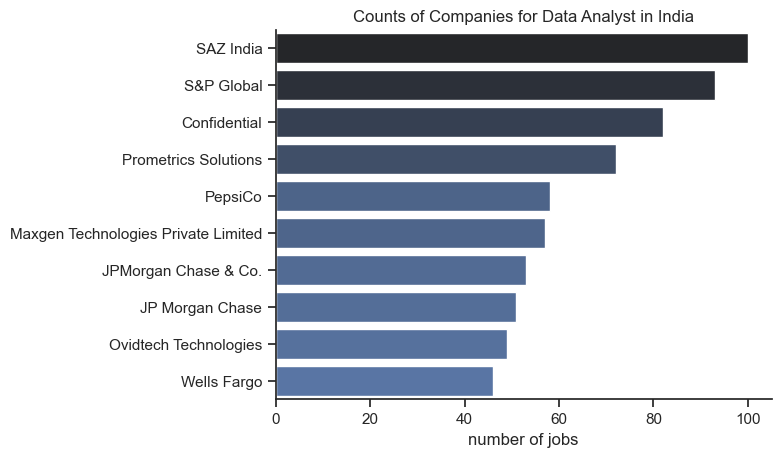

In [22]:

df_plot= df_DA_Ind['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y= 'company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Companies for Data Analyst in India')
plt.xlabel('number of jobs')
plt.ylabel('')
plt.show
